In [1]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import time

from draw_strokes import draw_strokes

from experiment import run_epoch
from lstm import LSTMGenerator, LSTMDiscriminator
from lstm_data import LSTMDataset, create_mask, create_batch_mask, revert

DATA_PATH = "sheep_market.npz"
data = np.load(DATA_PATH, allow_pickle=True, encoding="bytes")
train_raw_data = data["train"]
valid_raw_data = data["valid"]
test_raw_data = data["test"]


In [2]:

EPOCHS = 1
DIM = 4
H_DIM = 16
LAYERS = 4
BATCH_SIZE = 64
LEARNING_RATE = 0.0002
NUM_WORKERS = 8

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
NUM_WORKERS = 0 if DEVICE == "cpu" else 2

generator = LSTMGenerator(h_dim=H_DIM, dim=DIM, num_layers=LAYERS)
discriminator = LSTMDiscriminator(h_dim=H_DIM, dim=DIM, num_layers=LAYERS)

generator.to(DEVICE)
discriminator.to(DEVICE)

# z = torch.normal(torch.zeros(BATCH_SIZE, H_DIM), 1) # B, H
    
train = LSTMDataset(train_raw_data)
valid = LSTMDataset(valid_raw_data)
test = LSTMDataset(test_raw_data)

train_loader = DataLoader(train, batch_size=BATCH_SIZE, num_workers=NUM_WORKERS, shuffle=True)
valid_loader = DataLoader(valid, batch_size=BATCH_SIZE, num_workers=NUM_WORKERS, shuffle=False)
test_loader = DataLoader(test, batch_size=BATCH_SIZE, num_workers=NUM_WORKERS, shuffle=False)

optimizer_generator = optim.Adam(generator.parameters(), lr=LEARNING_RATE)
optimizer_discriminator = optim.Adam(discriminator.parameters(), lr=LEARNING_RATE)

criterion = nn.BCEWithLogitsLoss()

# b1 = next(iter(train_loader))
# mask = create_batch_mask(b1)
# z = torch.normal(torch.zeros(BATCH_SIZE, H_DIM), 1) # B, H
# g = generator(z)
# d = discriminator(train[0])


In [4]:
DO_TRAINING = False
if DO_TRAINING:
    train_generator_losses = []
    train_discriminator_losses = []

    validation_generator_losses = []
    validation_discriminator_losses = []

    for epoch in range(EPOCHS):

        print("===="*4, f"Epoch {epoch+1} / {EPOCHS}", "===="*4)
        time_stamp = time.time()

        train_g_loss, train_d_loss = run_epoch(generator, discriminator, train_loader, criterion, optimizer_generator, optimizer_discriminator, DEVICE, learn=True)

        train_generator_losses.append(train_g_loss)
        train_discriminator_losses.append(train_d_loss)

        print(f"Train : Time Elapsed: {(time.time() - time_stamp):6f}")
        print("    G_Loss: {}".format(f"{train_g_loss:.6f}"))
        print("    D_Loss: {}".format(f"{train_d_loss:.6f}"))

        time_stamp = time.time()
        
        validation_g_loss, validation_d_loss = run_epoch(generator, discriminator, train_loader, criterion, optimizer_generator, optimizer_discriminator, DEVICE, learn=False)

        print(f"Validation : Time Elapsed: {(time.time() - time_stamp):6f}")
        print("    G_Loss: {}".format(f"{validation_g_loss:.6f}"))
        print("    D_Loss: {}".format(f"{validation_d_loss:.6f}"))

        validation_generator_losses.append(validation_g_loss)
        validation_discriminator_losses.append(validation_d_loss)


In [5]:
SAVE = False
if SAVE:

    GENERATOR_PATH = "weights/gen.pth"
    DISCRIMINATOR_PATH = "weights/dis.pth"

    generator.save(GENERATOR_PATH)
    discriminator.save(DISCRIMINATOR_PATH)


In [10]:
GENERATOR_PATH = "weights/gen.pth"
DIM = 4
H_DIM = 64
LAYERS = 4
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

generator = LSTMGenerator(h_dim=H_DIM, dim=DIM, num_layers=LAYERS)
generator.load(GENERATOR_PATH)


[[-547 -621 0]
 [-560 -621 0]
 [-567 -620 0]
 [-571 -619 0]
 [-573 -619 0]
 [-573 -619 0]
 [-573 -618 0]
 [-573 -618 0]
 [-573 -618 0]
 [-573 -618 0]
 [-573 -618 0]
 [-573 -618 0]
 [-573 -619 0]
 [-573 -619 0]
 [-573 -619 0]
 [-573 -619 0]
 [-573 -619 0]
 [-573 -619 0]
 [-573 -619 0]
 [-573 -619 0]
 [-573 -619 0]
 [-573 -619 0]
 [-573 -619 0]
 [-573 -619 0]
 [-573 -619 0]
 [-573 -619 0]
 [-573 -619 0]
 [-573 -619 0]
 [-573 -619 0]
 [-573 -619 0]
 [-573 -619 0]
 [-573 -619 0]
 [-573 -619 0]
 [-573 -619 0]
 [-573 -619 0]
 [-573 -619 0]
 [-573 -619 0]
 [-573 -619 0]
 [-573 -619 0]
 [-573 -619 0]
 [-573 -619 0]
 [-573 -619 0]
 [-573 -619 0]
 [-573 -619 0]
 [-573 -619 0]
 [-573 -619 0]
 [-573 -619 0]
 [-573 -619 0]
 [-573 -619 0]
 [-573 -619 0]
 [-573 -619 0]
 [-573 -619 0]
 [-573 -619 0]
 [-573 -619 0]
 [-573 -619 0]
 [-573 -619 0]
 [-573 -619 0]
 [-573 -619 0]
 [-573 -619 0]
 [-573 -619 0]
 [-573 -619 0]
 [-573 -619 0]
 [-573 -619 0]
 [-573 -619 0]
 [-573 -619 0]
 [-573 -619 0]
 [-573 -61

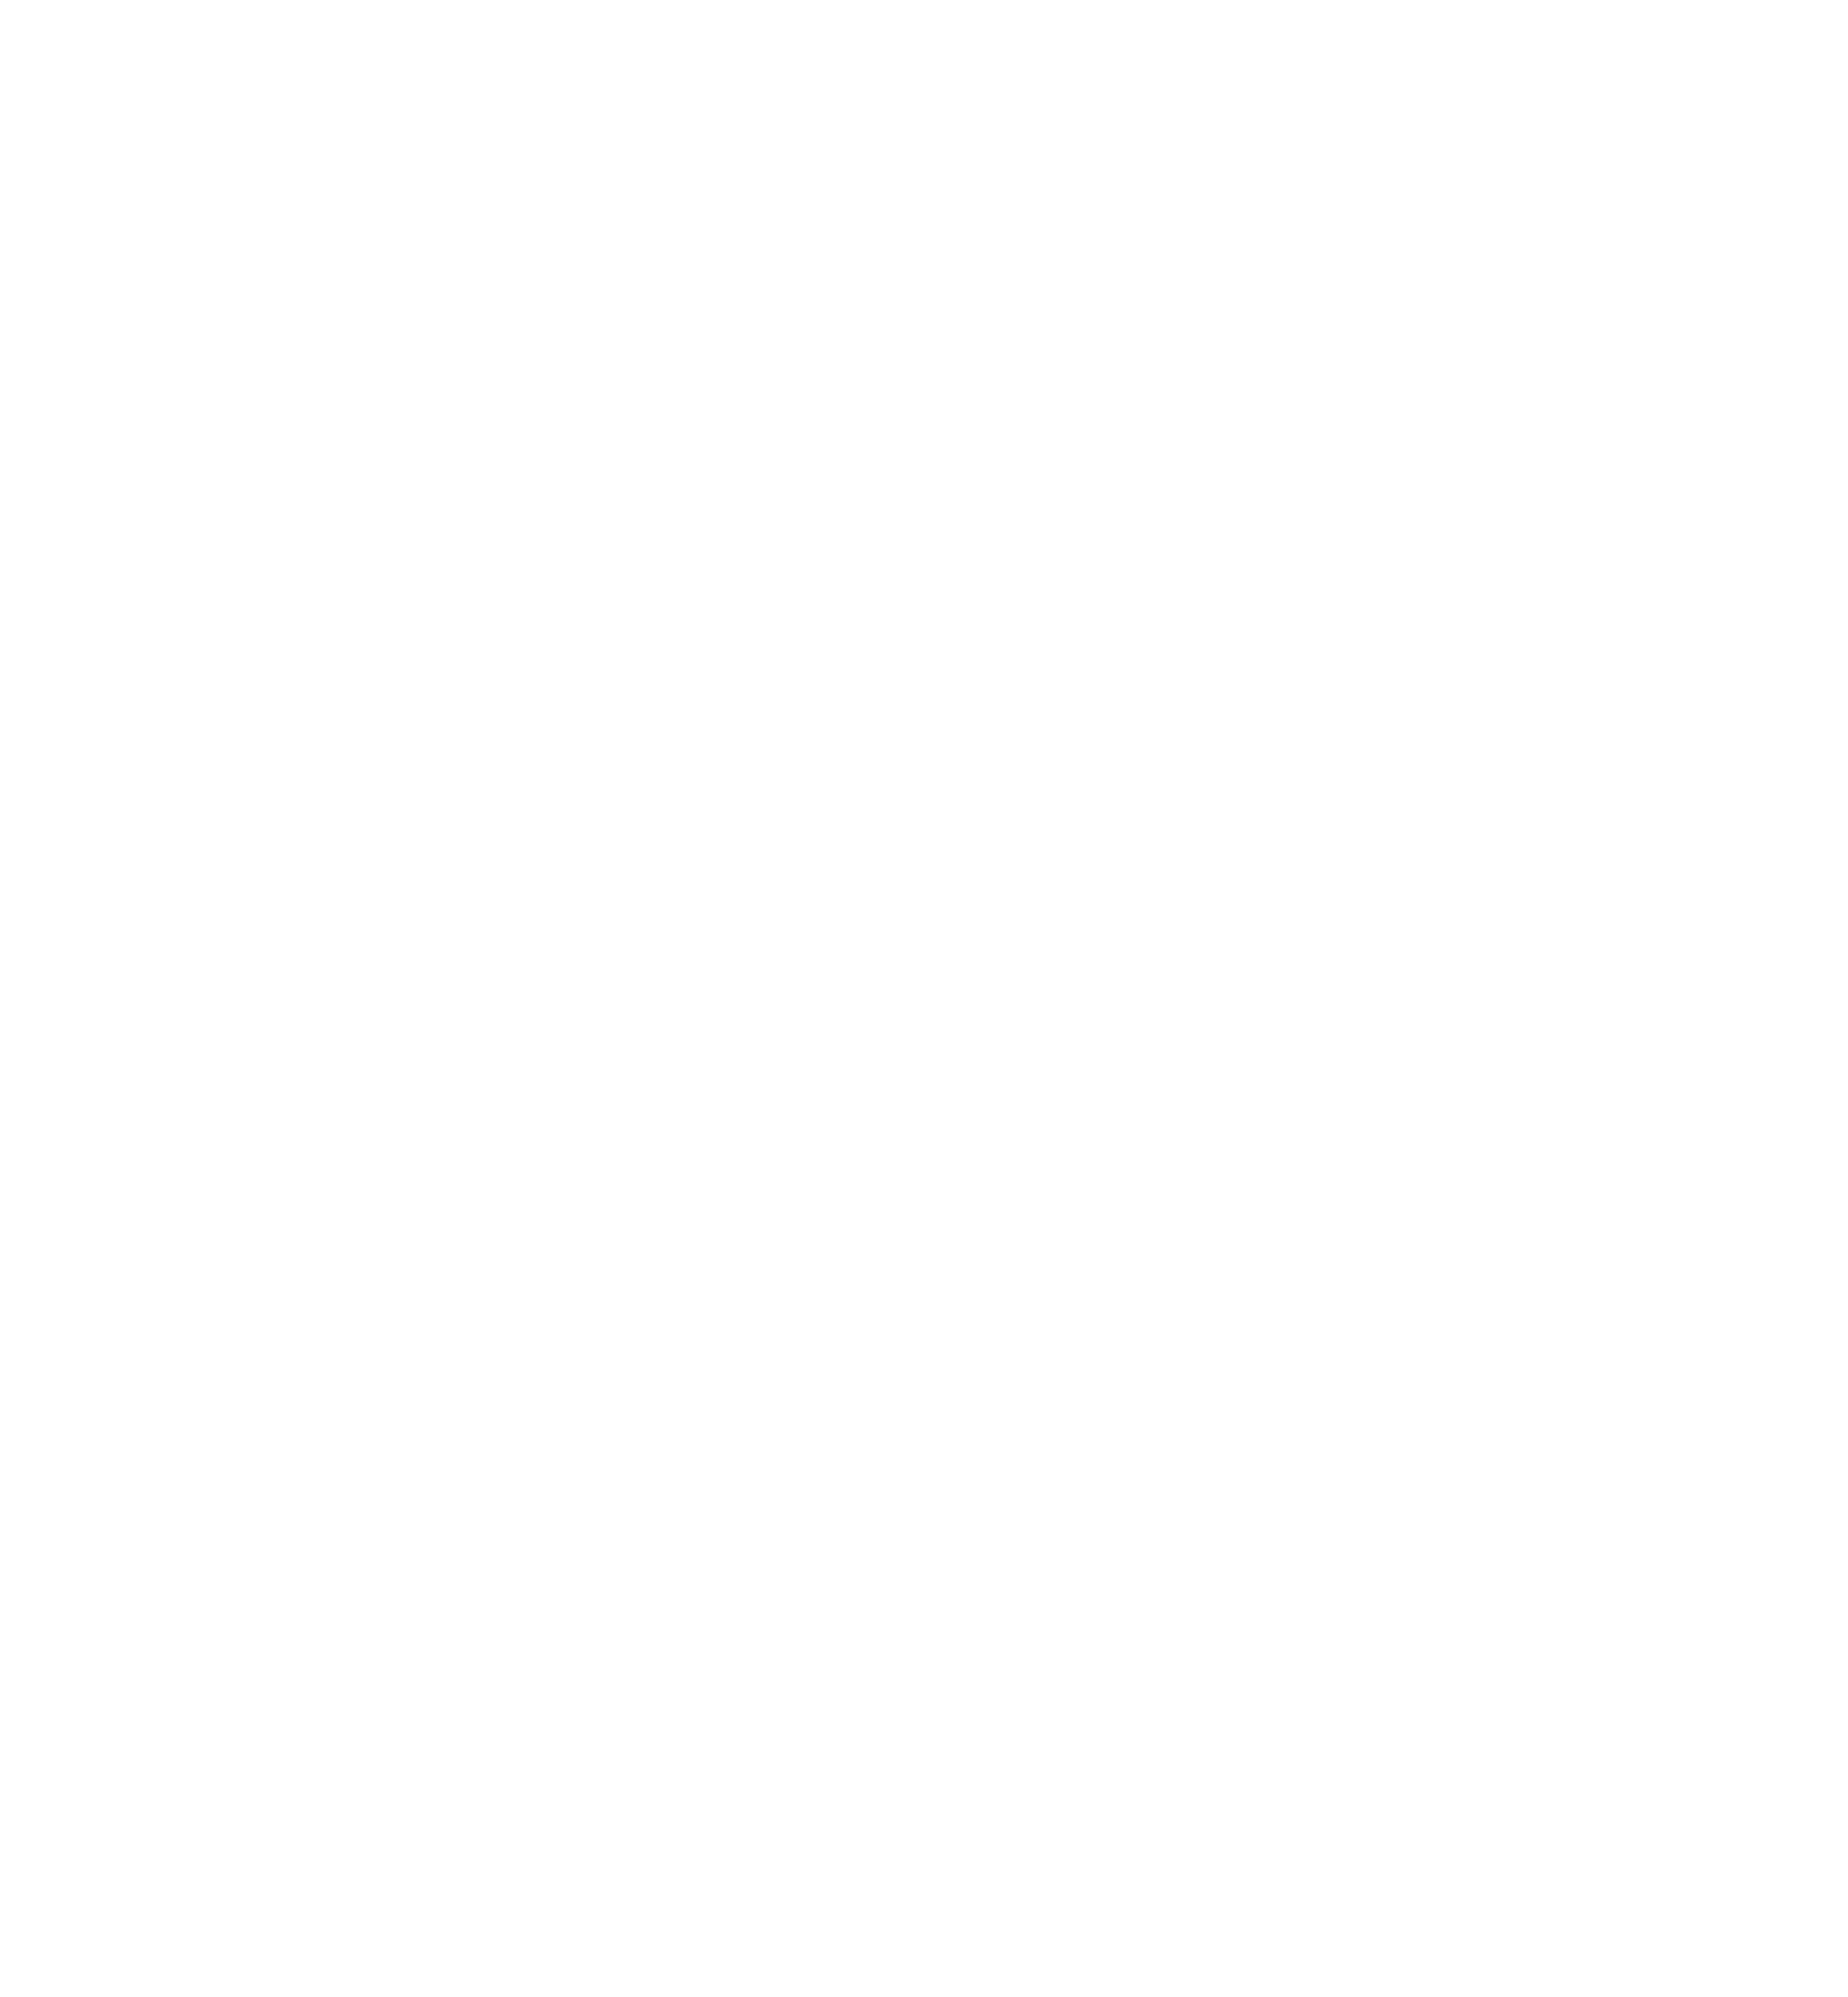

In [11]:
z = torch.normal(torch.zeros(1, H_DIM), 1) # B, H
gen = generator(z)
gen = revert(gen)
print(gen)

# draw_strokes(gen)


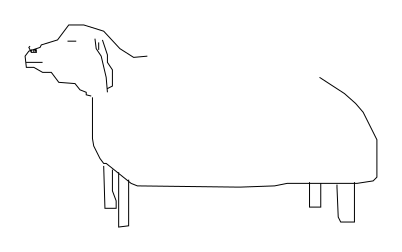

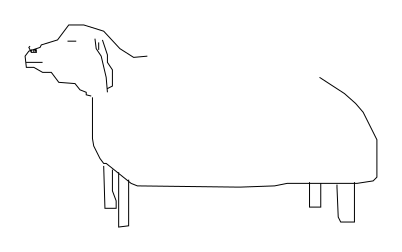

In [8]:
ITEM = 10

rev = revert(train[ITEM])
raw = train_raw_data[ITEM]

draw_strokes(rev)
draw_strokes(raw)
